In [7]:
# Import Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import load_iris
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


In [8]:
# Load and Split Dataset

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# Function to plot a confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

# Function to plot decision boundaries (only for 2D data)
def plot_decision_boundaries(X, y, model, title):
    plt.figure(figsize=(10, 6))
    h = .02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o', cmap='coolwarm')
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.title(title)
    plt.show()


Logistic Regression Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



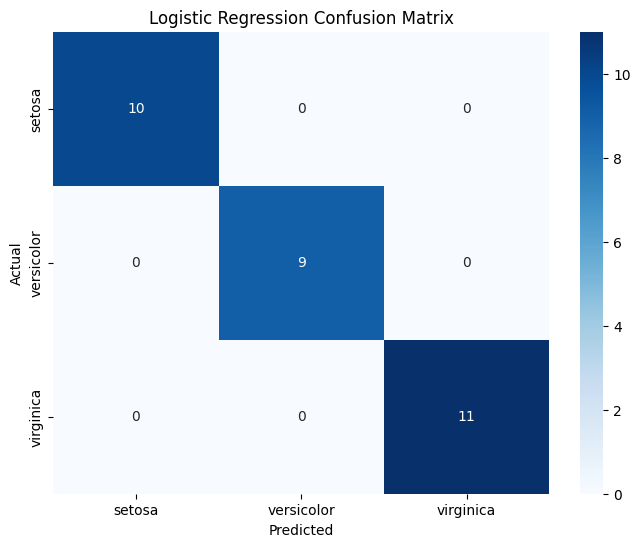

In [10]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

# Print classification report
print('Logistic Regression Classification Report:')
print(classification_report(y_test, y_pred, target_names=target_names))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, 'Logistic Regression Confusion Matrix')


Decision Tree Classifier Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      0.90      0.95        10
  versicolor       0.40      0.44      0.42         9
   virginica       0.55      0.55      0.55        11

    accuracy                           0.63        30
   macro avg       0.65      0.63      0.64        30
weighted avg       0.65      0.63      0.64        30



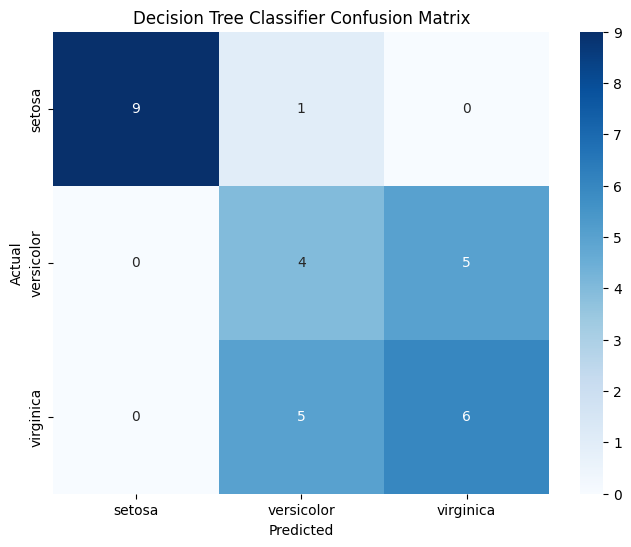

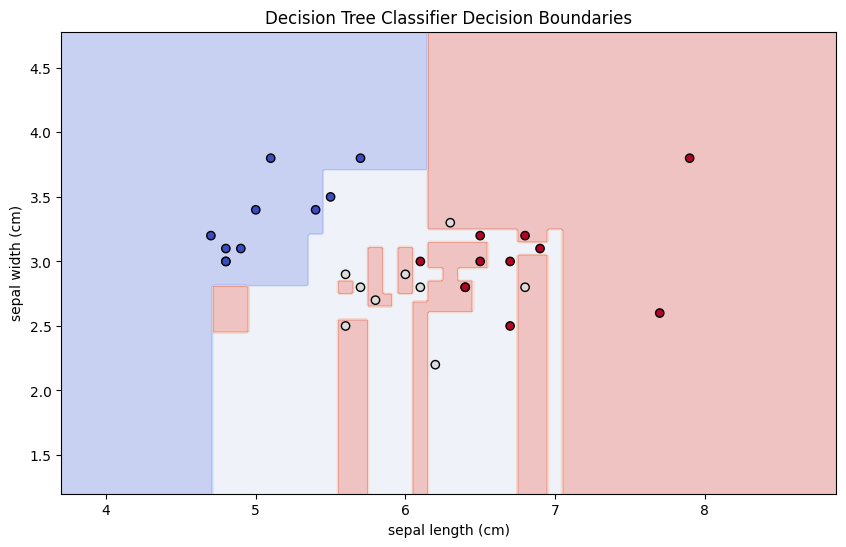

In [11]:
# Decision Tree Classifier
# Train the model using only the first 2 features
X_train_2d = X_train[:, :2]
X_test_2d = X_test[:, :2]
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train_2d, y_train)
y_pred = tree_clf.predict(X_test_2d)

# Print classification report
print('Decision Tree Classifier Classification Report:')
print(classification_report(y_test, y_pred, target_names=target_names))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, 'Decision Tree Classifier Confusion Matrix')

# Plot decision boundaries
plot_decision_boundaries(X_test_2d, y_test, tree_clf, 'Decision Tree Classifier Decision Boundaries')


Random Forest Classifier Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.60      0.67      0.63         9
   virginica       0.70      0.64      0.67        11

    accuracy                           0.77        30
   macro avg       0.77      0.77      0.77        30
weighted avg       0.77      0.77      0.77        30



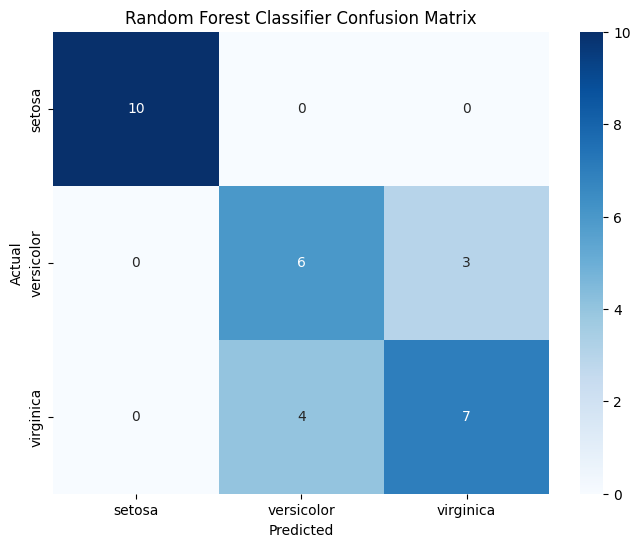

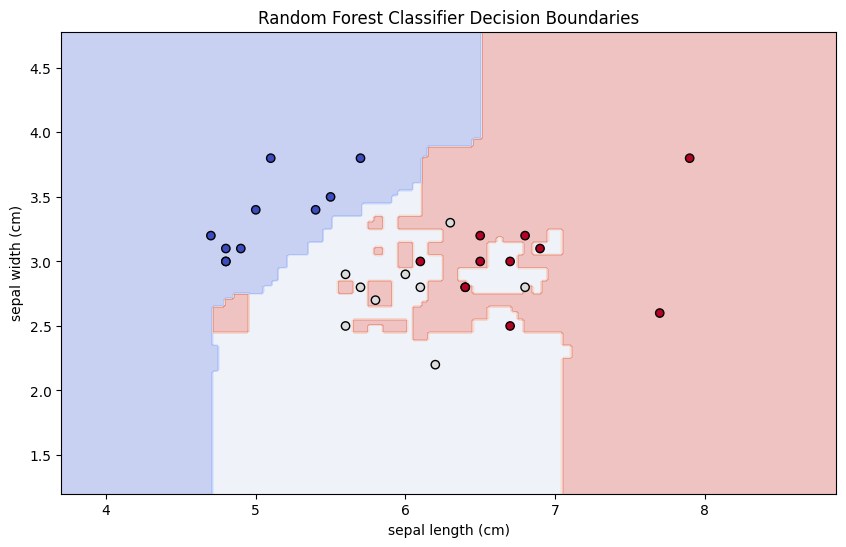

In [12]:
# Random Forest Classifier
# Train the model using only the first 2 features
forest_clf = RandomForestClassifier()
forest_clf.fit(X_train_2d, y_train)
y_pred = forest_clf.predict(X_test_2d)

# Print classification report
print('Random Forest Classifier Classification Report:')
print(classification_report(y_test, y_pred, target_names=target_names))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, 'Random Forest Classifier Confusion Matrix')

# Plot decision boundaries
plot_decision_boundaries(X_test_2d, y_test, forest_clf, 'Random Forest Classifier Decision Boundaries')


Support Vector Classifier Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



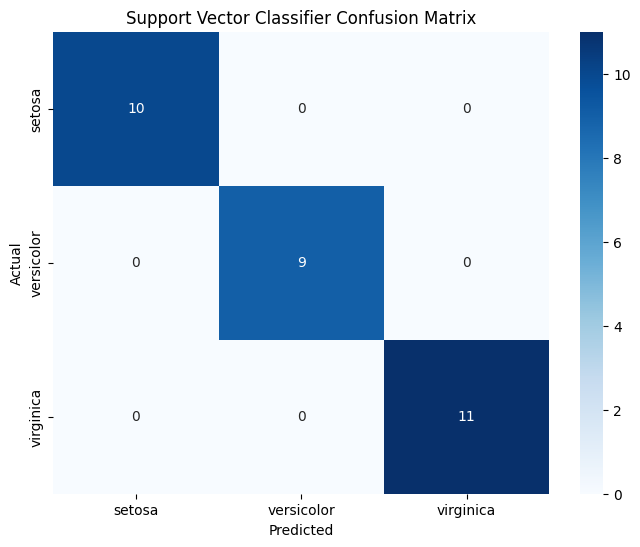

In [13]:
# Support Vector Classifier
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

# Print classification report
print('Support Vector Classifier Classification Report:')
print(classification_report(y_test, y_pred, target_names=target_names))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, 'Support Vector Classifier Confusion Matrix')


K-Nearest Neighbors Classifier Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.67      0.67      0.67         9
   virginica       0.73      0.73      0.73        11

    accuracy                           0.80        30
   macro avg       0.80      0.80      0.80        30
weighted avg       0.80      0.80      0.80        30



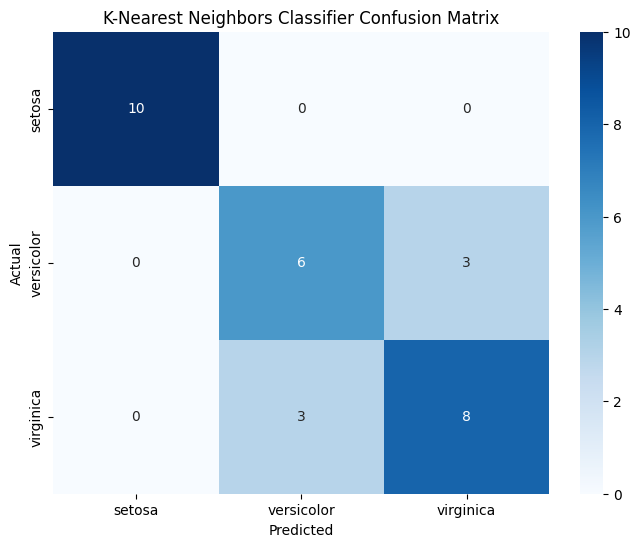

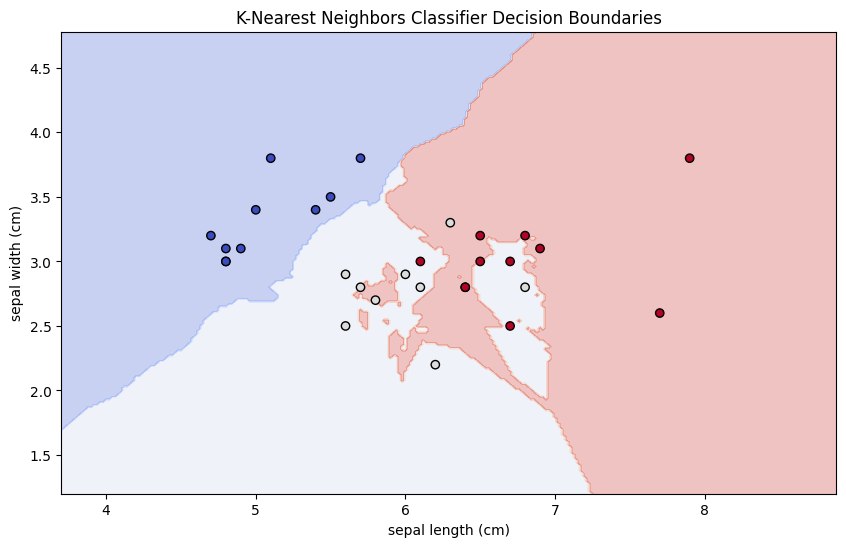

In [14]:
# K-Nearest Neighbors Classifier
# Train the model using only the first 2 features
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_2d, y_train)
y_pred = knn_clf.predict(X_test_2d)

# Print classification report
print('K-Nearest Neighbors Classifier Classification Report:')
print(classification_report(y_test, y_pred, target_names=target_names))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, 'K-Nearest Neighbors Classifier Confusion Matrix')

# Plot decision boundaries
plot_decision_boundaries(X_test_2d, y_test, knn_clf, 'K-Nearest Neighbors Classifier Decision Boundaries')


PCA + Logistic Regression Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



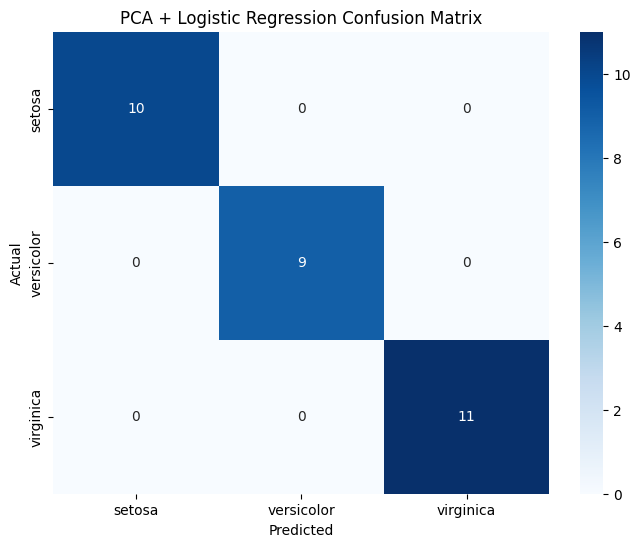

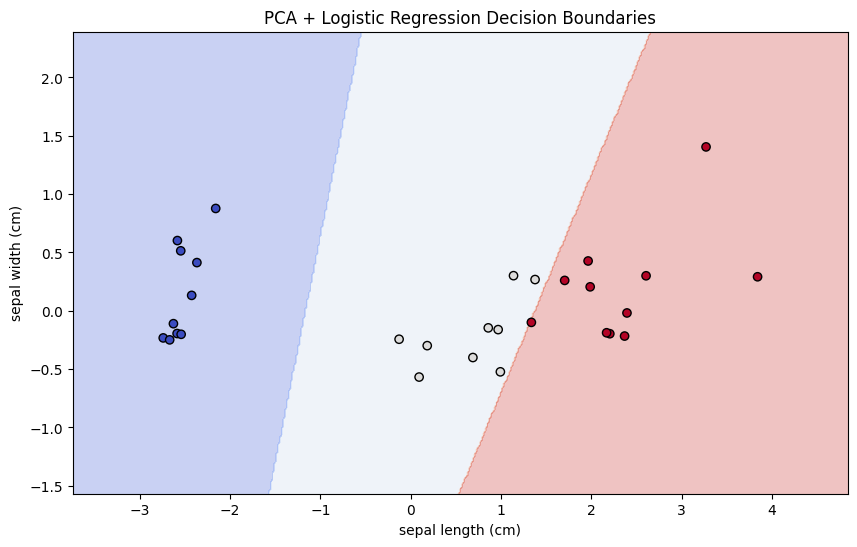

In [15]:
# PCA + Logistic Regression
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train logistic regression on PCA-transformed data
log_reg.fit(X_train_pca, y_train)
y_pred = log_reg.predict(X_test_pca)

# Print classification report
print('PCA + Logistic Regression Classification Report:')
print(classification_report(y_test, y_pred, target_names=target_names))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, 'PCA + Logistic Regression Confusion Matrix')

# Plot decision boundaries
plot_decision_boundaries(X_test_pca, y_test, log_reg, 'PCA + Logistic Regression Decision Boundaries')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Neural Network Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      1.00      0.95         9
   virginica       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



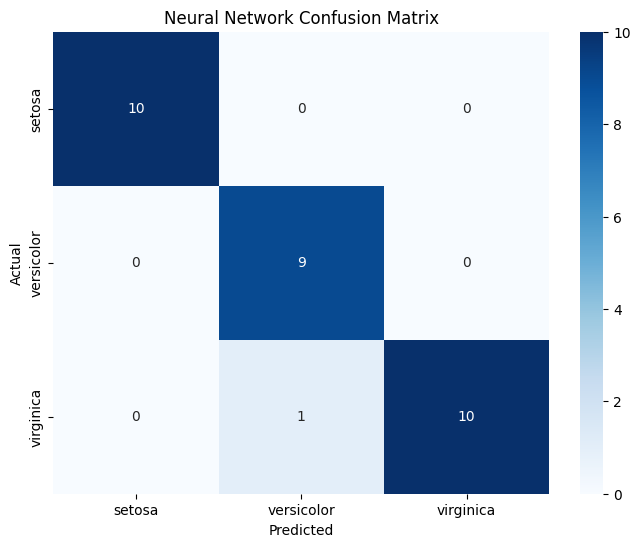

In [16]:
# Neural Network
# Build the model
model = Sequential()
model.add(Dense(64, input_dim=X.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))  # 3 classes for Iris

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

# Evaluate the model
y_pred = model.predict(X_test).argmax(axis=1)

# Print classification report
print('Neural Network Classification Report:')
print(classification_report(y_test, y_pred, target_names=target_names))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, 'Neural Network Confusion Matrix')
